In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [78]:
data_train = pd.read_csv('train.csv')
data_train.shape

(1460, 81)

In [79]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
data_test = pd.read_csv('test.csv')
data_test.shape

(1459, 80)

In [82]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Missing values

In [83]:
pd.set_option('display.max_rows', None)
data_train.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

#### Electrical

In feauter 'Electrical' only one value is missing. Probably, there is a standart electric system, therefore, it seems reasonable to replace NA with mode.

In [84]:
data_train['Electrical'] = data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])

##### MasVnrArea and MasVnrType

- masonry veneer area in square feet and its type

These features go together. Homes in USA are typically frame houses (wooden structure). To make the house look more expensive and aesthetically pleasing, the exterior walls are covered with a this layer of stone or brick. This layer is call Masonry Veneer.

If MasVnrType is None, then MasVnr area equals to 0.



In [85]:
data_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [86]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('None')

In [87]:
data_train['MasVnrType'].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

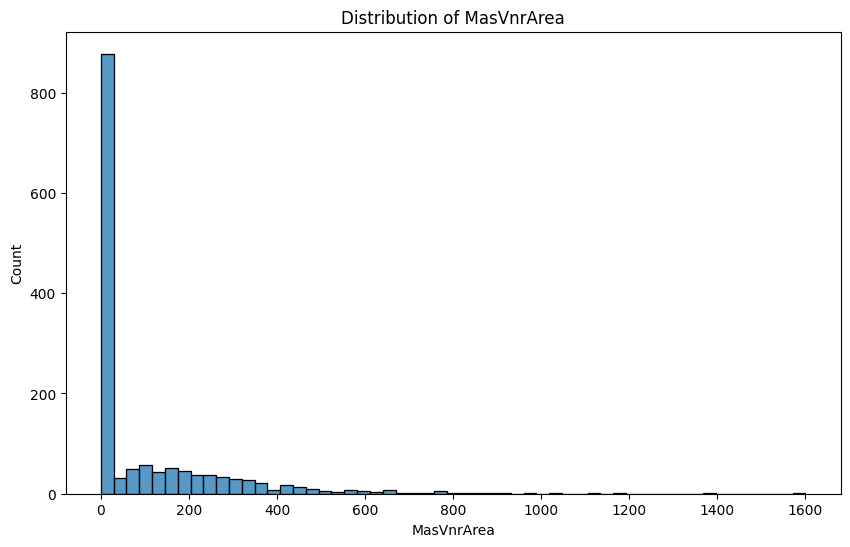

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(data_train['MasVnrArea'].dropna(), kde=False)
plt.title('Distribution of MasVnrArea')
plt.show()  

It is logical, that if the type is None, then NA in Areas values can be replaced by 0. Let's realize this.

In [89]:
mask = (data_train['MasVnrArea'].isna()) & (data_train['MasVnrType'] == 'None')
data_train.loc[mask, 'MasVnrArea'] = 0

In [90]:
data_train['MasVnrArea'].isna().sum()

np.int64(0)

All NA values disappeared.

##### BSMT:***

These all features refer to the characteristics of basement. In dataset there is a feature called TotalBsmtSF which reflects the total area of basement. This feature lacks of Na, so probably the presence of NA in corresponding features may be linked with no basement or with zero basement area.

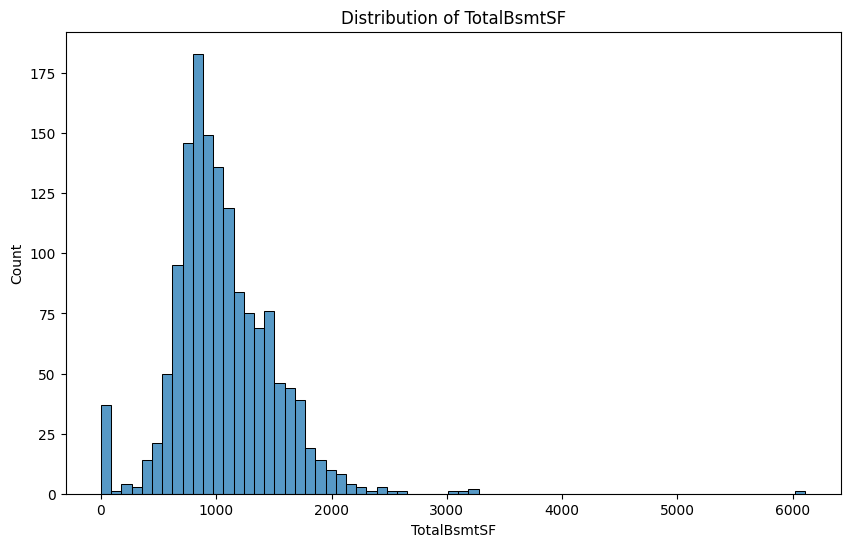

In [91]:
plt.figure(figsize=(10,6))
sns.histplot(data_train['TotalBsmtSF'], kde=False)
plt.title('Distribution of TotalBsmtSF')
plt.show()

In [92]:
for col in ['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']:
    mask1 = (data_train[col].isna()) & (data_train['TotalBsmtSF'] == 0)
    data_train.loc[mask1, col] = 'No Basement'

data_train[['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']].isna().sum()   

BsmtFinType1    0
BsmtFinType2    1
BsmtCond        0
BsmtQual        0
BsmtExposure    1
dtype: int64

In [93]:
data_train[data_train['BsmtFinType2'].isna()].loc[:, ['BsmtQual', 'TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
332,Gd,3206


In [94]:
data_train[data_train['BsmtExposure'].isna()].loc[:, ['BsmtQual', 'TotalBsmtSF']]

,BsmtQual,TotalBsmtSF
948,Gd,936


In [102]:
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna(data_train['BsmtExposure'].mode()[0])
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna(data_train['BsmtFinType2'].mode()[0])

In [103]:
data_train[['BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtExposure']].isna().sum()   

BsmtFinType1    0
BsmtFinType2    0
BsmtCond        0
BsmtQual        0
BsmtExposure    0
dtype: int64

#### Garage:***

There are 7 features referred to a garage, in each 5 of them there are 81 NA values.

According to the dataset description, NA in Garage features means No garage. Let's replace NA in categorial features with 'No garage' and in GarageYrBlt with 0. In oder to not replace real NA values (if they exist) with 'No garage', i will base on GarageArea.

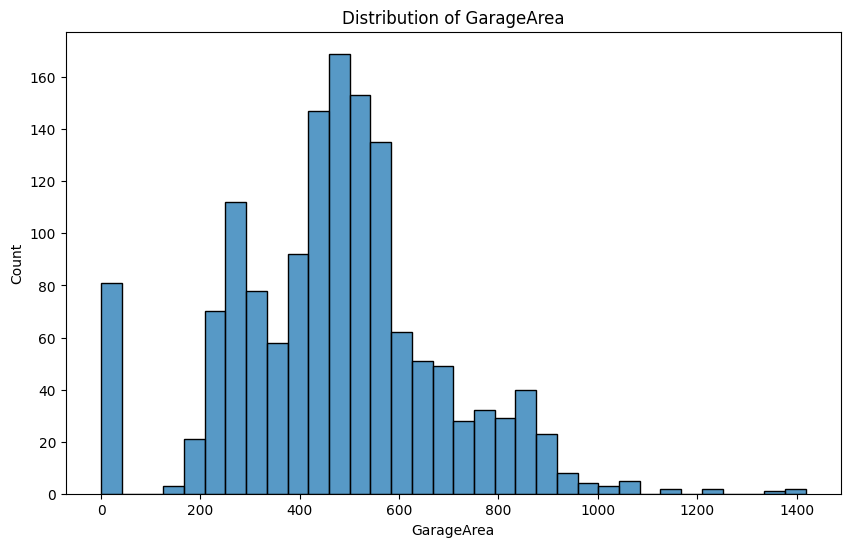

In [104]:
plt.figure(figsize=(10,6))
sns.histplot(data_train['GarageArea'], kde=False)
plt.title('Distribution of GarageArea') 
plt.show()

In [107]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    mask2 = (data_train[col].isna()) & (data_train['GarageArea'] == 0)
    data_train.loc[mask2, col] = 'No Garage'

data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(0)
data_train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']].isna().sum() 

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
dtype: int64

##### Lot frontage

Linear feet of street connected to the property. Simply put, it's the width of the lot facing the road.

259 LotFrontage values are missing.

A zero value would mean the property has no street access, which is rare case.

Reasons for NaN:

- Irregular shapes: Cul-de-sac lots (pie-shaped) or corner lots are hard to measure.

- "Flag" Lots: Lots set back from the road with a narrow driveway (panhandle).

- Data Entry Omission: Realtors might skip this field focusing on LotArea instead becaouse of it importance for taxes.

It seems that LotFrontage may vary by neighbourhood. 

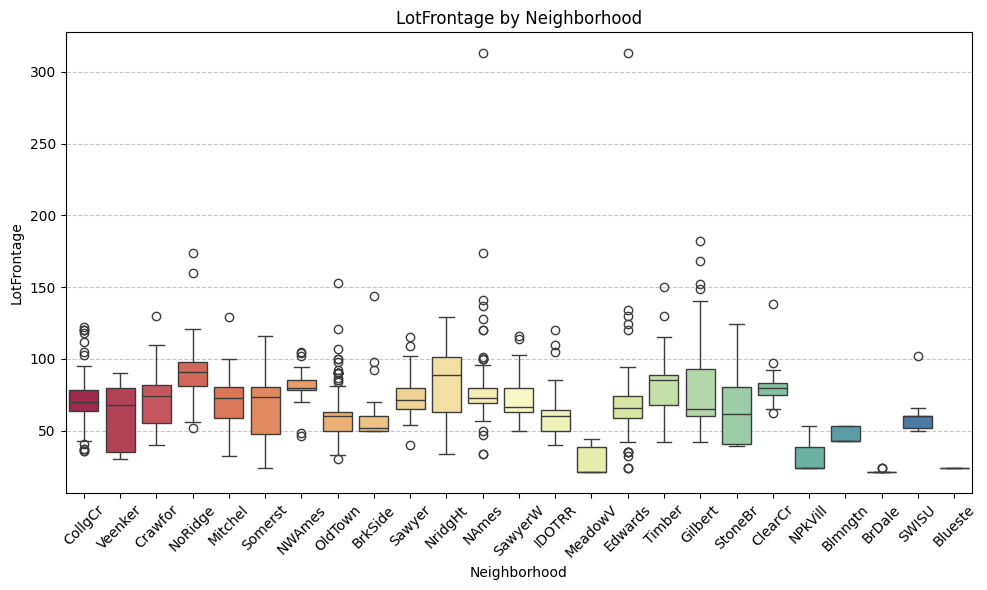

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=data_train, hue='Neighborhood', palette='Spectral')
plt.xticks(rotation=45)
plt.title('LotFrontage by Neighborhood')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [114]:
data_train['LotFrontage'] = data_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### FireplaceQu

This features is connected with FirePlace that reflects how many fireplaces are in a house. Na mean that there are no any fireplaces. 

In [118]:
mask3 = (data_train['FireplaceQu'].isna()) & (data_train['Fireplaces'] == 0)
data_train.loc[mask3, 'FireplaceQu'] = 'No Fireplace'

data_train['FireplaceQu'].isna().sum()

np.int64(0)

##### Fence, Alley, MisFeature

According to the data description, NA in these features means lack of these features in a house. Le'ts do replacement.

In [ ]:
data_train['Fence'] = data_train['Fence'].fillna('No Fence')
data_train['Alley'] = data_train['Alley'].fillna('No Alley')
data_train['MiscFeature'] = data_train['MiscFeature'].fillna('No Feature')

##### PoolQC

This feature goes together with PoolArea. Let's replace NA in quality with 'No pool', if area is zero.

In [121]:
mask4 = (data_train['PoolQC'].isna()) & (data_train['PoolArea'] == 0)
data_train.loc[mask4, 'PoolQC'] = 'No Pool'

data_train['PoolQC'].isna().sum()

np.int64(0)

## Feature engineering

In [96]:
y = data_train['SalePrice']
X = data_train.drop(columns=['SalePrice'], inplace=True)

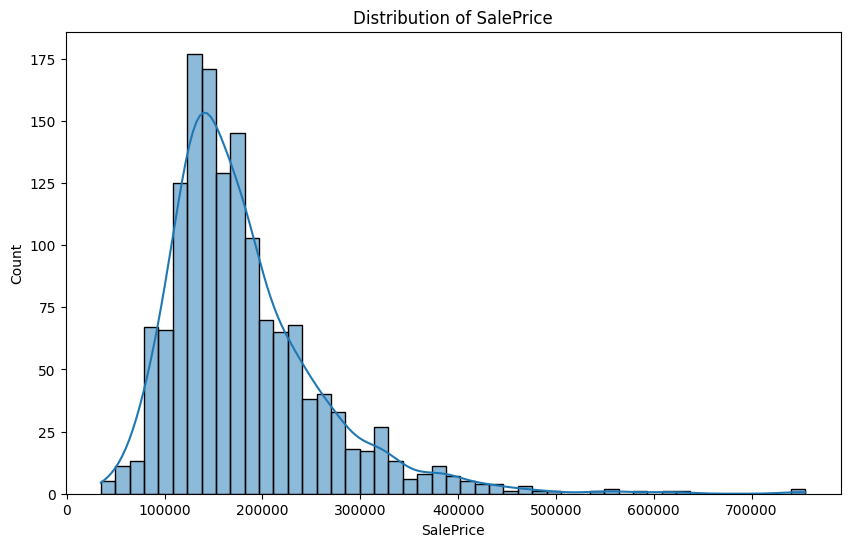

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [98]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [99]:
pd.DataFrame(y).skew()

SalePrice    1.882876
dtype: float64

The distribution is skewed to the right, mean is greater than median (50%). The skewness coefficient is almost 2.